In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
cars = pd.read_csv('./project.csv')

In [3]:
cars.nunique()

Id                  1436
Model                372
Price                236
Age_08_04             77
Mfg_Month             12
Mfg_Year               7
KM                  1263
Fuel_Type              3
HP                    12
Met_Color              2
Automatic              2
cc                    13
Doors                  4
Cylinders              1
Gears                  4
Quarterly_Tax         13
Weight                59
Mfr_Guarantee          2
BOVAG_Guarantee        2
Guarantee_Period       9
ABS                    2
Airbag_1               2
Airbag_2               2
Airco                  2
Automatic_airco        2
Boardcomputer          2
CD_Player              2
Central_Lock           2
Powered_Windows        2
Power_Steering         2
Radio                  2
Mistlamps              2
Sport_Model            2
Backseat_Divider       2
Metallic_Rim           2
Radio_cassette         2
Tow_Bar                2
dtype: int64

In [4]:
# Age_08_04

C:\Users\Angela\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


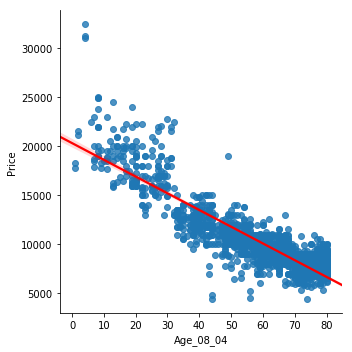

In [5]:
sns.lmplot(x='Age_08_04', y='Price', data=cars, line_kws={"color": "red"})

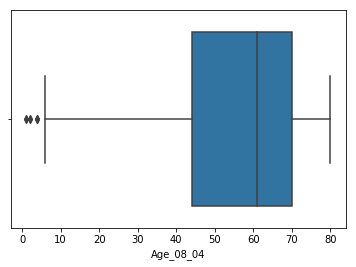

In [6]:
sns.boxplot(data=cars, x= 'Age_08_04', orient="h")

In [7]:
# no outliers

In [8]:
# Mfg_Year

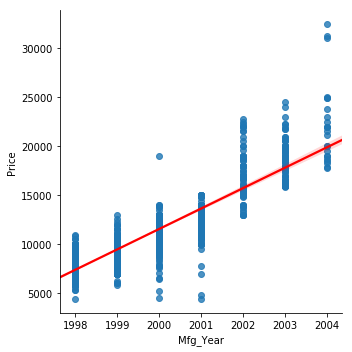

In [9]:
sns.lmplot(x='Mfg_Year', y='Price', data=cars, line_kws={"color": "red"})

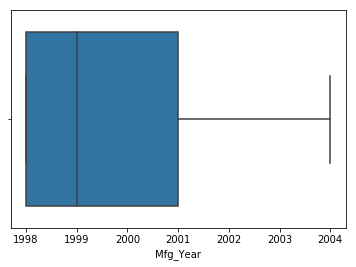

In [10]:
sns.boxplot(data=cars, x= 'Mfg_Year', orient="h")

In [11]:
# no outliers

In [12]:
# KM

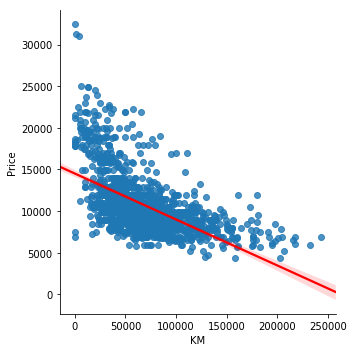

In [13]:
sns.lmplot(x='KM', y='Price', data=cars, line_kws={"color": "red"})

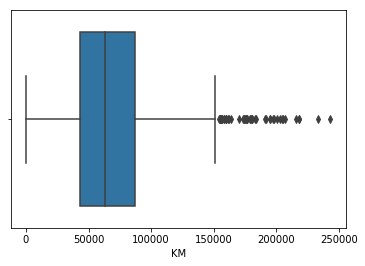

In [14]:
sns.boxplot(data=cars, x= 'KM', orient="h")

In [15]:
# looks like there may be some outliers

In [16]:
Q1 = np.percentile(cars['KM'],q=25)
Q3 = np.percentile(cars['KM'],q=75)
IQ = Q3 - Q1
LowerOutlier = Q1 - 3*IQ
UpperOutlier = Q3 + 3*IQ
print (LowerOutlier, Q1, IQ, Q3, UpperOutlier)

-89062.25 43000.0 44020.75 87020.75 219083.0


In [17]:
rowcount = cars[cars['KM'] < LowerOutlier].Id.count()
print (rowcount, cars[cars['KM'] < LowerOutlier].KM.nunique())
if rowcount >= 1:
    print (cars[cars['KM'] < LowerOutlier].KM.unique())
    sns.lmplot(x='KM', y='Price', data=cars[cars.KM >= LowerOutlier], line_kws={"color": "red"})

0 0


2 2
[243000 232940]


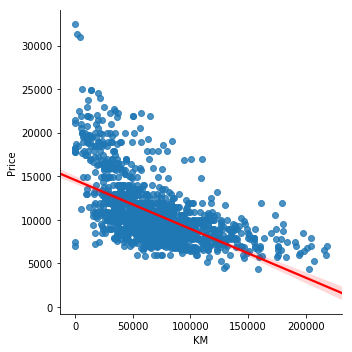

In [18]:
rowcount = cars[cars['KM'] > UpperOutlier].Id.count()
print (rowcount, cars[cars['KM'] > UpperOutlier].KM.nunique())
if rowcount >= 1:
    print (cars[cars['KM'] > UpperOutlier].KM.unique())
    sns.lmplot(x='KM', y='Price', data=cars[cars.KM <= UpperOutlier], line_kws={"color": "red"})

In [19]:
# outliers do not affect assumptions and do not make any significant difference to the result

In [20]:
# HP

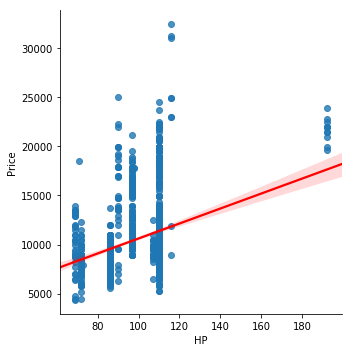

In [21]:
sns.lmplot(x='HP', y='Price', data=cars, line_kws={"color": "red"})

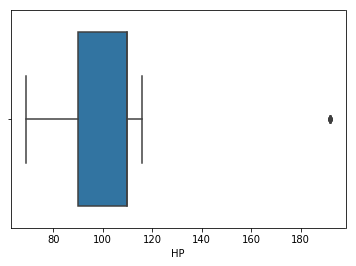

In [22]:
sns.boxplot(data=cars, x= 'HP', orient="h")

In [23]:
# looks like there may be some outliers

In [24]:
Q1 = np.percentile(cars['HP'],q=25)
Q3 = np.percentile(cars['HP'],q=75)
IQ = Q3 - Q1
LowerOutlier = Q1 - 3*IQ
UpperOutlier = Q3 + 3*IQ
print (LowerOutlier, Q1, IQ, Q3, UpperOutlier)

30.0 90.0 20.0 110.0 170.0


In [25]:
rowcount = cars[cars['HP'] < LowerOutlier].Id.count()
print (rowcount, cars[cars['HP'] < LowerOutlier].HP.nunique())
if rowcount >= 1:
    print (cars[cars['HP'] < LowerOutlier].HP.unique())
    sns.lmplot(x='HP', y='Price', data=cars[cars.HP >= LowerOutlier], line_kws={"color": "red"})

0 0


11 1
[192]


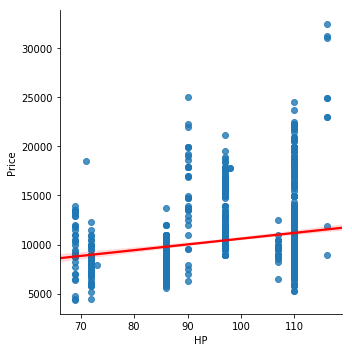

In [26]:
rowcount = cars[cars['HP'] > UpperOutlier].Id.count()
print (rowcount, cars[cars['HP'] > UpperOutlier].HP.nunique())
if rowcount >= 1:
    print (cars[cars['HP'] > UpperOutlier].HP.unique())
    sns.lmplot(x='HP', y='Price', data=cars[cars.HP <= UpperOutlier], line_kws={"color": "red"})

In [27]:
# outliers do not significantly affect results and it is realistic for some Toyota Corollas to have HP > 170
# a HP value of 192 is realistic for some models of Toyota Corolla

In [28]:
# cc

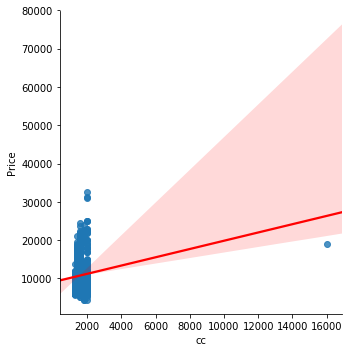

In [29]:
sns.lmplot(x='cc', y='Price', data=cars, line_kws={"color": "red"})

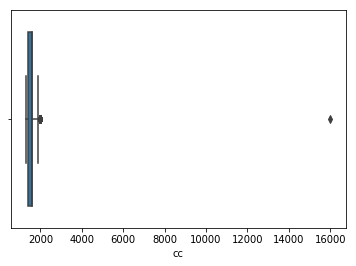

In [30]:
sns.boxplot(data=cars, x= 'cc', orient="h")

In [31]:
# there is an obvious outlier

In [32]:
Q1 = np.percentile(cars['cc'],q=25)
Q3 = np.percentile(cars['cc'],q=75)
IQ = Q3 - Q1
LowerOutlier = Q1 - 3*IQ
UpperOutlier = Q3 + 3*IQ
print (LowerOutlier, Q1, IQ, Q3, UpperOutlier)

800.0 1400.0 200.0 1600.0 2200.0


1 1
[16000]


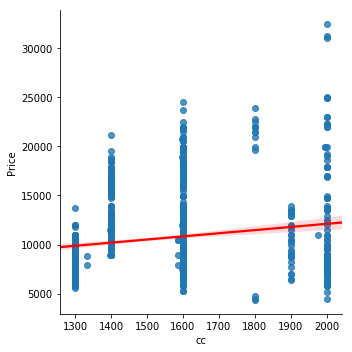

In [33]:
rowcount = cars[cars['cc'] > UpperOutlier].Id.count()
print (rowcount, cars[cars['cc'] > UpperOutlier].cc.nunique())
if rowcount >= 1:
    print (cars[cars['cc'] > UpperOutlier].cc.unique())
    sns.lmplot(x='cc', y='Price', data=cars[cars.cc <= UpperOutlier], line_kws={"color": "red"})

In [34]:
# a cc value that high is an obvious error in entering data

In [35]:
# Quarterly_Tax

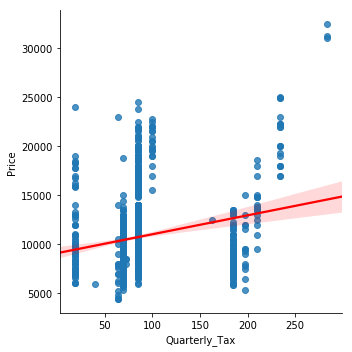

In [36]:
sns.lmplot(x='Quarterly_Tax', y='Price', data=cars, line_kws={"color": "red"})

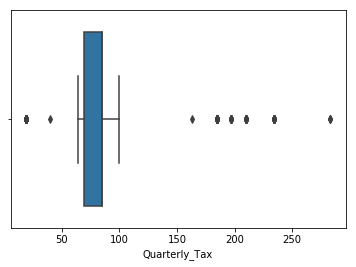

In [37]:
sns.boxplot(data=cars, x= 'Quarterly_Tax', orient="h")

In [38]:
# looks like there may be some outliers

In [39]:
Q1 = np.percentile(cars['Quarterly_Tax'],q=25)
Q3 = np.percentile(cars['Quarterly_Tax'],q=75)
IQ = Q3 - Q1
LowerOutlier = Q1 - 3*IQ
UpperOutlier = Q3 + 3*IQ
print (LowerOutlier, Q1, IQ, Q3, UpperOutlier)

21.0 69.0 16.0 85.0 133.0


72 1
[19]


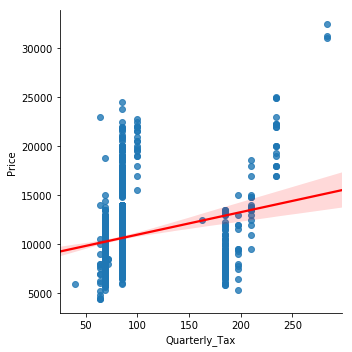

In [40]:
rowcount = cars[cars['Quarterly_Tax'] < LowerOutlier].Id.count()
print (rowcount, cars[cars['Quarterly_Tax'] < LowerOutlier].Quarterly_Tax.nunique())
if rowcount >= 1:
    print (cars[cars['Quarterly_Tax'] < LowerOutlier].Quarterly_Tax.unique())
    sns.lmplot(x='Quarterly_Tax', y='Price', data=cars[cars.Quarterly_Tax >= LowerOutlier], line_kws={"color": "red"})

151 6
[210 185 234 283 197 163]


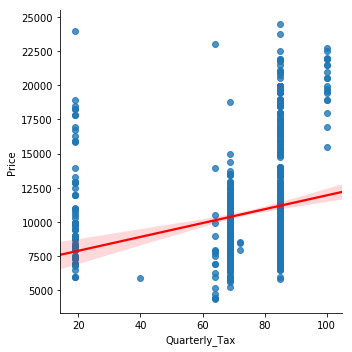

In [41]:
rowcount = cars[cars['Quarterly_Tax'] > UpperOutlier].Id.count()
print (rowcount, cars[cars['Quarterly_Tax'] > UpperOutlier].Quarterly_Tax.nunique())
if rowcount >= 1:
    print (cars[cars['Quarterly_Tax'] > UpperOutlier].Quarterly_Tax.unique())
    sns.lmplot(x='Quarterly_Tax', y='Price', data=cars[cars.Quarterly_Tax <= UpperOutlier], line_kws={"color": "red"})

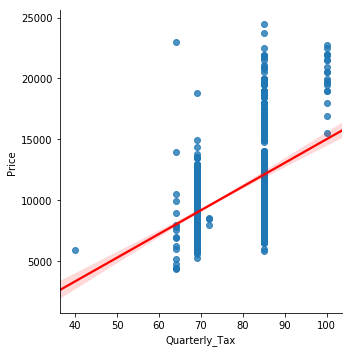

In [42]:
cars2 = cars[cars.Quarterly_Tax >= LowerOutlier]
cars3 = cars2[cars2.Quarterly_Tax <= UpperOutlier]
sns.lmplot(x='Quarterly_Tax', y='Price', data=cars3, line_kws={"color": "red"})

In [43]:
# outliers do not affect assumptions and do not make any significant difference to the result
# I have no reference for what are realistic values for Quarterly Tax

In [44]:
# Weight

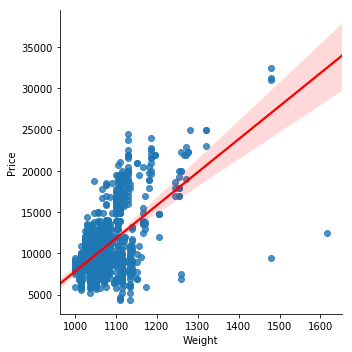

In [45]:
sns.lmplot(x='Weight', y='Price', data=cars, line_kws={"color": "red"})

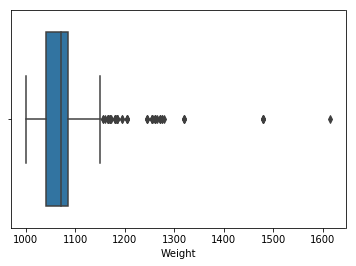

In [46]:
sns.boxplot(data=cars, x= 'Weight', orient="h")

In [47]:
# looks like there may be some outliers

In [48]:
Q1 = np.percentile(cars['Weight'],q=25)
Q3 = np.percentile(cars['Weight'],q=75)
IQ = Q3 - Q1
LowerOutlier = Q1 - 3*IQ
UpperOutlier = Q3 + 3*IQ
print (LowerOutlier, Q1, IQ, Q3, UpperOutlier)

905.0 1040.0 45.0 1085.0 1220.0


In [49]:
rowcount = cars[cars['Weight'] < LowerOutlier].Id.count()
print (rowcount, cars[cars['Weight'] < LowerOutlier].Weight.nunique())
if rowcount >= 1:
    print (cars[cars['Weight'] < LowerOutlier].Weight.unique())
    sns.lmplot(x='Weight', y='Price', data=cars[cars.Weight >= LowerOutlier], line_kws={"color": "red"})

0 0


30 10
[1245 1255 1270 1275 1265 1260 1480 1320 1280 1615]


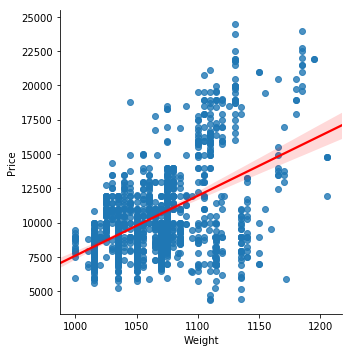

In [50]:
rowcount = cars[cars['Weight'] > UpperOutlier].Id.count()
print (rowcount, cars[cars['Weight'] > UpperOutlier].Weight.nunique())
if rowcount >= 1:
    print (cars[cars['Weight'] > UpperOutlier].Weight.unique())
    sns.lmplot(x='Weight', y='Price', data=cars[cars.Weight <= UpperOutlier], line_kws={"color": "red"})

In [51]:
# outliers do not significantly affect results and it is realistic some Toyota Corollas to have a weight > 1220
# even though some of the higher weights seem unrealistic they are not statistically significant

In [52]:
cars = cars[cars.cc < 2200]

In [53]:
cars.to_csv('./project_clean.csv', index=False)